In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


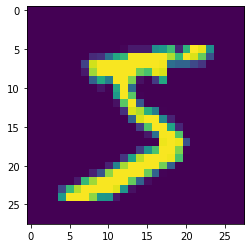

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:

y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
cnn= keras.Sequential()
cnn.add(keras.layers.Conv1D(filters=32,kernel_size=3,input_shape=(28,28),activation='relu'))
cnn.add(keras.layers.MaxPooling1D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(50,activation='relu'))
cnn.add(keras.layers.Dense(10,activation='sigmoid'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 3ms/step - loss: 0.2608 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1039 - accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0465 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9844


[0.05543088540434837, 0.9843999743461609]

In [ ]:
y_pred=cnn.predict(x_test)
y_pred

array([[1.02287166e-04, 2.60976315e-01, 6.68589100e-02, ...,
        9.99999881e-01, 5.95461093e-02, 4.88114119e-01],
       [7.23829627e-01, 5.29711127e-01, 1.00000000e+00, ...,
        3.35072969e-09, 9.54483151e-01, 1.64831770e-09],
       [1.02937767e-04, 9.99981046e-01, 1.21508889e-01, ...,
        6.18400633e-01, 1.58439457e-01, 1.43541489e-02],
       ...,
       [7.25927833e-08, 1.48782204e-03, 2.86199042e-06, ...,
        4.94133741e-01, 9.79675651e-01, 9.23065424e-01],
       [6.39128673e-04, 5.82766457e-09, 3.77403921e-07, ...,
        5.43272449e-07, 9.57753897e-01, 1.62164215e-04],
       [6.88557863e-01, 2.31849277e-04, 4.90930816e-03, ...,
        7.29468482e-12, 7.98726978e-05, 5.32645208e-04]], dtype=float32)

In [ ]:
[np.argmax(y_pred[i]) for i in range(6)]

[7, 2, 1, 0, 4, 1]

In [ ]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_pred_labels=[np.argmax(ele) for ele in y_pred]



In [ ]:
tensorflow.math.confusion_matrix(y_test,y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    1,    1,    0,    2,    1,    0,    1,    0],
       [   0, 1129,    3,    1,    0,    0,    1,    0,    1,    0],
       [   1,    1, 1023,    2,    1,    0,    0,    4,    0,    0],
       [   0,    0,    4, 1001,    0,    4,    0,    0,    1,    0],
       [   0,    1,    4,    0,  965,    0,    3,    0,    1,    8],
       [   1,    2,    0,    8,    0,  872,    7,    1,    0,    1],
       [   4,    2,    1,    0,    0,    2,  949,    0,    0,    0],
       [   0,    3,   13,    3,    1,    0,    0, 1005,    2,    1],
       [  10,    1,    2,    0,    0,    2,    8,    1,  947,    3],
       [   2,    2,    0,    6,    6,    3,    1,    2,    7,  980]],
      dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred_labels)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.97      0.99      0.98      1032\n           3       0.98      0.99      0.99      1010\n           4       0.99      0.98      0.99       982\n           5       0.99      0.98      0.98       892\n           6       0.98      0.99      0.98       958\n           7       0.99      0.98      0.98      1028\n           8       0.99      0.97      0.98       974\n           9       0.99      0.97      0.98      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'